In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem, Crippen, rdMolDescriptors, QED, Draw
import selfies as sf

# 1. example SELFIES
s = sf.encoder("c1ncnc2[nH]cnc12")  # encode SMILES -> SELFIES

print("SELFIES:", s)


SELFIES: [C][=N][C][=N][C][NH1][C][=N][C][Ring1][=Branch2][=Ring1][Branch1]


In [8]:
# 2. decode SELFIES -> SMILES
sm = sf.decoder(s)
print("SMILES:", sm)

SMILES: C1=NC=NC=2[NH1]C=NC1=2


Mol OK: True
logP: 0.3528999999999998
TPSA: 54.46
QED: 0.5454672838232756
Fingerprint length: 2048
MMFF energy: 18.894609998823068


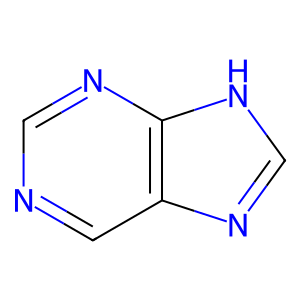

In [9]:
# 3. RDKit molecule
mol = Chem.MolFromSmiles(sm)
print("Mol OK:", mol is not None)

# 4. Sanitize
Chem.SanitizeMol(mol)

# 5. Basic descriptors
print("logP:", Crippen.MolLogP(mol))
# octanol–water partition coefficient (logP), which estimates lipophilicity (how hydrophobic a molecule is)
# higher logP → more lipophilic (less water-soluble)
print("TPSA:", rdMolDescriptors.CalcTPSA(mol))
# Topological Polar Surface Area (TPSA) -> reflects the polar surface of the molecule, mainly from oxygen and nitrogen atoms and their attached hydrogens
# important for drug absorption, permeability, and bioavailability
print("QED:", QED.qed(mol))
# Quantitative Estimate of Drug-likeness (QED)
# scores molecules from 0 to 1 based on multiple properties (like MW, logP, TPSA, H-bond donors/acceptors, rotatable bonds) to indicate how “drug-like” a molecule is

# 6. Fingerprint
fp = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2).GetFingerprint(mol)
print("Fingerprint length:", len(fp))

# 7. 3D + MMFF
# we need a 3D structure before using MMFF (Merck Molecular Force Field) because:
# MMFF is a force field method that calculates energies and optimizes geometry based on atomic positions in 3D space (bond lengths, angles, torsions, nonbonded interactions)
mol3D = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol3D)
AllChem.MMFFOptimizeMolecule(mol3D)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol3D)
ff = AllChem.MMFFGetMoleculeForceField(mol3D, mmff_props)
print("MMFF energy:", ff.CalcEnergy())

# 8. draw the mol
Draw.MolToImage(mol)

1. Hydrogen cyanide (HCN)                C#N
2. Formaldehyde                          C=O
3. Methanol                              CO
4. Ethanol                               CCO
5. Acetaldehyde                          CC=O
6. Glycolaldehyde                        O=CCO
7. Formic acid                           O=C(O)
8. Urea                                  NC(=O)N
9. Ammonia                               N
10. Water                                 O
11. Glycine                               NCC(=O)O
12. Alanine                               CC(C(=O)O)N
13. Acetic acid                           CC(=O)O
14. Ethylamine                            CCN
15. Methanethiol                          CS
16. Pyruvic acid                          CC(=O)C(=O)O
17. Acetone                               CC(=O)C
18. Carbon dioxide                        O=C=O
19. Carbonyl sulfide                      O=C=S
20. Phosphoric acid / orthophosphate      OP(=O)(O)O
21. Benzene                               c1ccccc1
22. Imidazole                             c1cnc[nH]1
23. Pyrrole                               c1cc[nH]c1
24. Cyclopentane                          C1CCCC1
25. Cyclohexane                           C1CCCCC1
26. Aminopyrimidine                       NC1=NC=CN1
27. Furan                                 c1ccoc1
28. Lactic acid                           OCC(=O)O
29. Purine                                c1ncnc2[nH]cnc12
30. Pyrophosphate                         OP(=O)(O)OP(=O)(O)O
31. beta-Hydroxybutyric acid              CC(O)C(=O)O
32. Glyceraldehyde                        O=CC(O)CO
33. Dihydroxyacetone                      O=C(CO)CO
34. Formamide                             NC=O
35. Ethene                                C=C
36. Propionic acid                        CCC(=O)O
37. Succinic acid                         O=C(O)CCC(=O)O
38. Cysteamine                            NCCS
39. Thiourea                              NC(=S)N
40. Ribose                                OC[C@H]1OC(O)[C@H](O)[C@@H]1O

In [12]:
def smiles_to_selfies(smiles_list):
    """
    Convert a list of SMILES strings to SELFIES strings.
    
    Parameters:
        smiles_list (list of str): List of SMILES molecules.
    
    Returns:
        list of str: Corresponding SELFIES strings.
    """
    selfies_list = []
    for smi in smiles_list:
        try:
            selfies_str = sf.encoder(smi)
            selfies_list.append(selfies_str)
        except Exception as e:
            print(f"Failed to encode SMILES '{smi}': {e}")
            selfies_list.append(None)
    return selfies_list

# Example usage
smiles_pool = ["C#N", "C=O", "CO", "CCO", "CC=O","O=CCO", "O=C(O)", "NC(=O)N", "N", "O", "NCC(=O)O", "CC(C(=O)O)N", "CC(=O)O", "CCN", "CS", "CC(=O)C(=O)O", "CC(=O)C", "O=C=O", "O=C=S", "OP(=O)(O)O", "c1ccccc1", "c1cnc[nH]1", "c1cc[nH]c1", "C1CCCC1", "C1CCCCC1", "NC1=NC=CN1", "c1ccoc1", "OCC(=O)O", "c1ncnc2[nH]cnc12", "OP(=O)(O)OP(=O)(O)O", "CC(O)C(=O)O", "O=CC(O)CO", "O=C(CO)CO", "NC=O", "C=C", "CCC(=O)O", "O=C(O)CCC(=O)O", "NCCS", "NC(=S)N", "OC[C@H]1OC(O)[C@H](O)[C@@H]1O"]
selfies_pool = smiles_to_selfies(smiles_pool)

for smi, s in zip(smiles_pool, selfies_pool):
    print(smi, "->", s)

print(selfies_pool)

C#N -> [C][#N]
C=O -> [C][=O]
CO -> [C][O]
CCO -> [C][C][O]
CC=O -> [C][C][=O]
O=CCO -> [O][=C][C][O]
O=C(O) -> [O][=C][O]
NC(=O)N -> [N][C][=Branch1][C][=O][N]
N -> [N]
O -> [O]
NCC(=O)O -> [N][C][C][=Branch1][C][=O][O]
CC(C(=O)O)N -> [C][C][Branch1][=Branch1][C][=Branch1][C][=O][O][N]
CC(=O)O -> [C][C][=Branch1][C][=O][O]
CCN -> [C][C][N]
CS -> [C][S]
CC(=O)C(=O)O -> [C][C][=Branch1][C][=O][C][=Branch1][C][=O][O]
CC(=O)C -> [C][C][=Branch1][C][=O][C]
O=C=O -> [O][=C][=O]
O=C=S -> [O][=C][=S]
OP(=O)(O)O -> [O][P][=Branch1][C][=O][Branch1][C][O][O]
c1ccccc1 -> [C][=C][C][=C][C][=C][Ring1][=Branch1]
c1cnc[nH]1 -> [C][=C][N][=C][NH1][Ring1][Branch1]
c1cc[nH]c1 -> [C][C][=C][NH1][C][=Ring1][Branch1]
C1CCCC1 -> [C][C][C][C][C][Ring1][Branch1]
C1CCCCC1 -> [C][C][C][C][C][C][Ring1][=Branch1]
NC1=NC=CN1 -> [N][C][=N][C][=C][N][Ring1][Branch1]
c1ccoc1 -> [C][C][=C][O][C][=Ring1][Branch1]
OCC(=O)O -> [O][C][C][=Branch1][C][=O][O]
c1ncnc2[nH]cnc12 -> [C][=N][C][=N][C][NH1][C][=N][C][Ring1][=Bran

In [8]:
# Filtering the sematic robust alphabet to include only biogenic atoms, ring and branch tokens
filtered_alphabet = {'[#Branch1]','[#Branch2]','[#Branch3]','[#C+1]','[#C-1]','[#C]','[#N+1]','[#N]','[#O+1]','[#P+1]','[#P-1]','[#P]','[#S+1]','[#S-1]','[#S]','[=Branch1]','[=Branch2]','[=Branch3]','[=C+1]','[=C-1]','[=C]','[=N+1]','[=N-1]','[=N]','[=O+1]','[=O]','[=P+1]','[=P-1]','[=P]','[=Ring1]','[=Ring2]','[=Ring3]','[=S+1]','[=S-1]','[=S]','[Branch1]','[Branch2]','[Branch3]','[C+1]','[C-1]','[C]','[N+1]','[N-1]','[N]','[O+1]','[O-1]','[O]','[P+1]','[P-1]','[P]','[Ring1]','[Ring2]','[Ring3]','[S+1]','[S-1]','[S]'}